# OlivettiFaces using KMeans

In [1]:
from sklearn.datasets import fetch_olivetti_faces

X, y = fetch_olivetti_faces(random_state=42, return_X_y = True)
X.shape

(400, 4096)

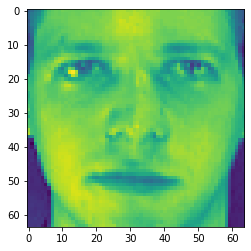

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(X[0].reshape((64,64)))
plt.show()

## Split data into train, tests and validation sets

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)

(320, 4096)
(80, 4096)


In [4]:
np.unique(y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2, stratify=y_train, random_state=42)
print(X_train.shape)
print(X_val.shape)

(256, 4096)
(64, 4096)


In [6]:
np.unique(y_val, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2,
        2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1]))

## Use PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
pca.fit(X_train)
print(pca.n_components_)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

188


## Train K-Means

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(random_state=42)
k_to_check = range(5,150,5)
inertia = []
silhouette = []
for k in k_to_check:
    print(f"\rTraining on k={k}", end='')
    kmeans.set_params(**{'n_clusters': k})
    kmeans.fit(X_train_pca)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_train_pca, kmeans.labels_))
    

Training on k=145

## Visualize results

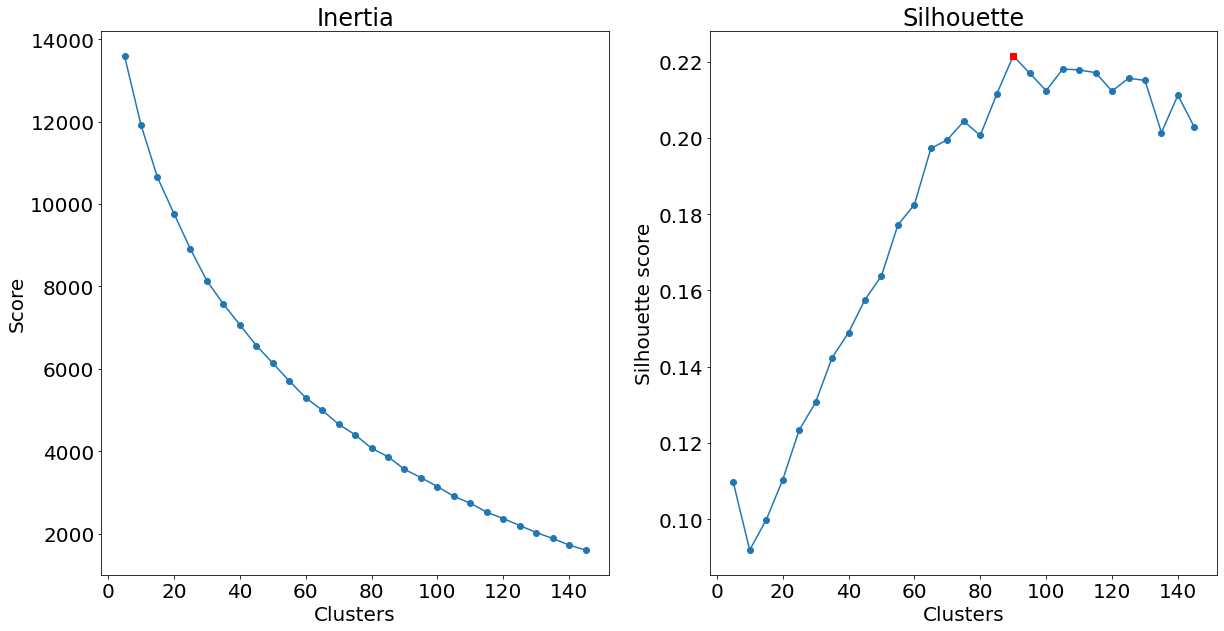

Best k:  90


In [9]:
plt.rc('font', size=20) 
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.plot(k_to_check, inertia, marker='o')
ax1.set(xlabel='Clusters', ylabel='Score')
ax1.set_title('Inertia')

ax2.plot(k_to_check, silhouette, marker='o')
ax2.set(xlabel='Clusters', ylabel='Silhouette score')
ax2.set_title('Silhouette')
# Best score
best = np.argmax(silhouette)
plt.plot(k_to_check[best], silhouette[best], "rs")
plt.show()
print("Best k: ", k_to_check[best])

## Train KMeans with 90 clusters



In [10]:
best_kmeans = KMeans(n_clusters=90, random_state=42)
best_kmeans.fit(X_train)
best_kmeans.score(X_val)

-2306.26953125

Cluster 0


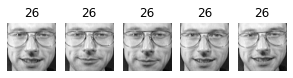

Cluster 1


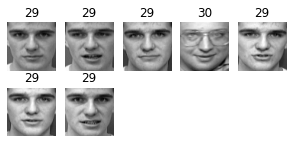

Cluster 2


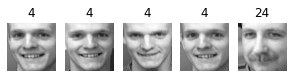

Cluster 3


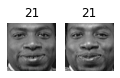

Cluster 4


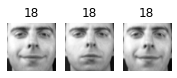

Cluster 5


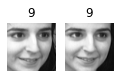

Cluster 6


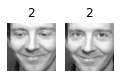

Cluster 7


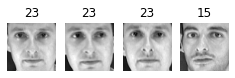

Cluster 8


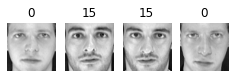

Cluster 9


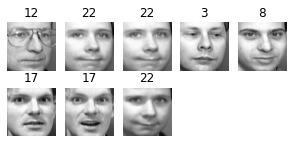

Cluster 10


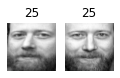

Cluster 11


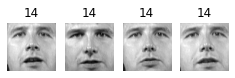

Cluster 12


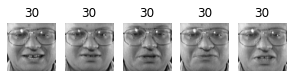

Cluster 13


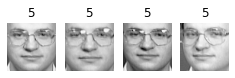

Cluster 14


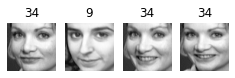

Cluster 15


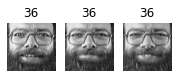

Cluster 16


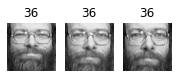

Cluster 17


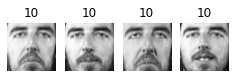

Cluster 18


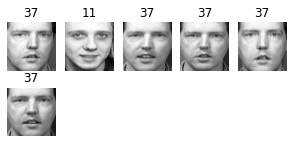

Cluster 19


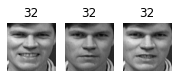

Cluster 20


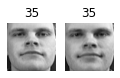

Cluster 21


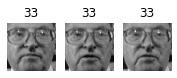

Cluster 22


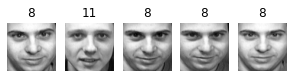

Cluster 23


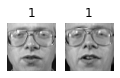

Cluster 24


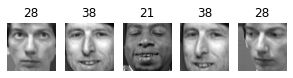

Cluster 25


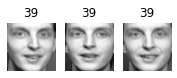

Cluster 26


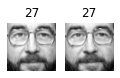

Cluster 27


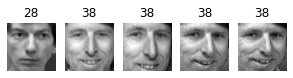

Cluster 28


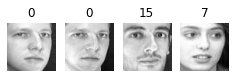

Cluster 29


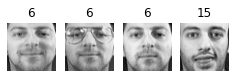

Cluster 30


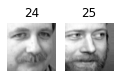

Cluster 31


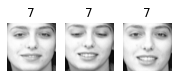

Cluster 32


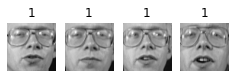

Cluster 33


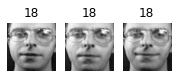

Cluster 34


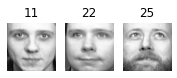

Cluster 35


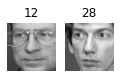

Cluster 36


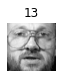

Cluster 37


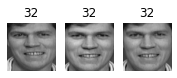

Cluster 38


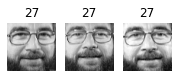

Cluster 39


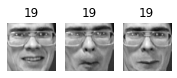

Cluster 40


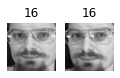

Cluster 41


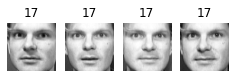

Cluster 42


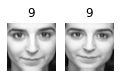

Cluster 43


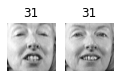

Cluster 44


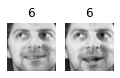

Cluster 45


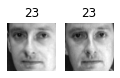

Cluster 46


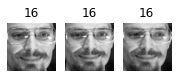

Cluster 47


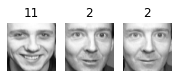

Cluster 48


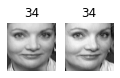

Cluster 49


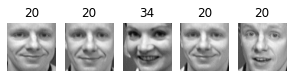

Cluster 50


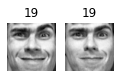

Cluster 51


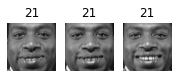

Cluster 52


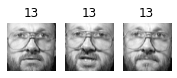

Cluster 53


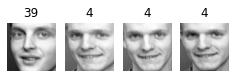

Cluster 54


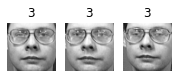

Cluster 55


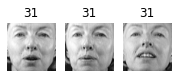

Cluster 56


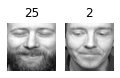

Cluster 57


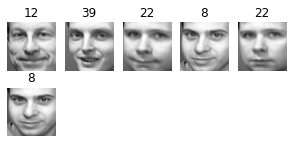

Cluster 58


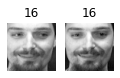

Cluster 59


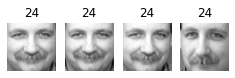

Cluster 60


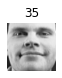

Cluster 61


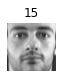

Cluster 62


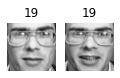

Cluster 63


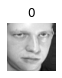

Cluster 64


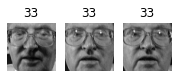

Cluster 65


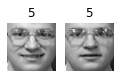

Cluster 66


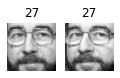

Cluster 67


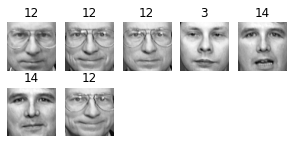

Cluster 68


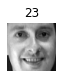

Cluster 69


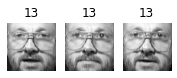

Cluster 70


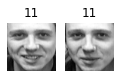

Cluster 71


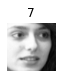

Cluster 72


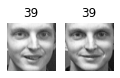

Cluster 73


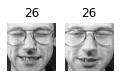

Cluster 74


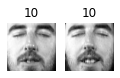

Cluster 75


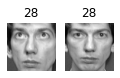

Cluster 76


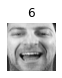

Cluster 77


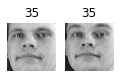

Cluster 78


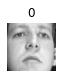

Cluster 79


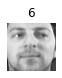

Cluster 80


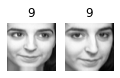

Cluster 81


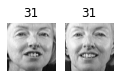

Cluster 82


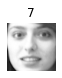

Cluster 83


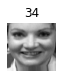

Cluster 84


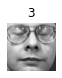

Cluster 85


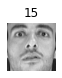

Cluster 86


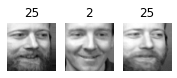

Cluster 87


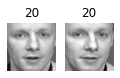

Cluster 88


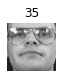

Cluster 89


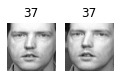

In [12]:
plt.rc('font', size=10) 

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_kmeans.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_kmeans.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

# Train classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=150, random_state=42)
forest.fit(X_train_pca, y_train)
forest.score(X_train_pca, y_train)

pred = forest.predict(X_val_pca)
print(np.sum(pred == y_val) / len(pred))

0.921875
